[Reference](https://medium.com/dataseries/multidimensional-scaling-for-dissimilarity-visualization-9fb061396cf3)

In [1]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling

foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary.shape)

(100, 10)


In [2]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix.shape)

(100, 100)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/pairwise.py:1738: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [3]:
dis_matrix

array([[0.        , 0.85714286, 0.57142857, ..., 0.375     , 0.88888889,
        0.33333333],
       [0.85714286, 0.        , 0.8       , ..., 0.71428571, 0.8       ,
        1.        ],
       [0.57142857, 0.8       , 0.        , ..., 0.42857143, 0.66666667,
        0.85714286],
       ...,
       [0.375     , 0.71428571, 0.42857143, ..., 0.        , 0.625     ,
        0.625     ],
       [0.88888889, 0.8       , 0.66666667, ..., 0.625     , 0.        ,
        1.        ],
       [0.33333333, 1.        , 0.85714286, ..., 0.625     , 1.        ,
        0.        ]])

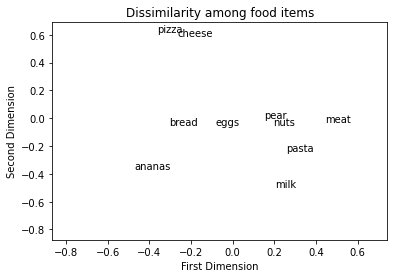

In [4]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
                                                                                                                                  
food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'ananas', 'pear', 'bread', 'nuts', 'milk']

plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()